In [1]:
push!(LOAD_PATH, pwd())
using FCV
using Plots, LinearAlgebra, Random
rng = MersenneTwister(7);

# Initialization

In [2]:
d = 1
N = 2^10
M = N
s = 3
What = [ abs(freq+1).^s for freq in -N/2:N/2-1 ]
function peaks(x, y) # peaks sample function from matlab
  x *= 6
  y *= 6
  z = 3*(1-x)^2*exp(-(x^2) - (y+1)^2) -
    10*(x/5 - x^3 - y^5)*exp(-x^2-y^2) -
    1/3*exp(-(x+1)^2 - y^2) 
  return z
end
fun = x -> peaks(x, 0)
nodes = (-N/2:N/2-1)/N
f = fun.(nodes)

sigma = 0.1
f_e = f+sigma*(maximum(f)-minimum(f))*randn(rng, size(f))

lambda = [ exp(t) for t in range(-20,0, length = 50) ]
cv = similar(lambda)
l2err = similar(lambda)

@time fcv = fcv_t_equispaced(d, f_e);

  2.130480 seconds (3.36 M allocations: 173.529 MiB, 2.07% gc time)


# Computations

In [3]:
@time for i in eachindex(lambda)
  res = compute(fcv, lambda[i]*What)
  cv[i] = res.gcv
  l2err[i] = 1/M*norm(f-res.f_r)
end

res = compute(fcv, lambda[argmin(cv)]*What);

  2.586746 seconds (3.78 M allocations: 200.670 MiB, 4.28% gc time)


# Plotting

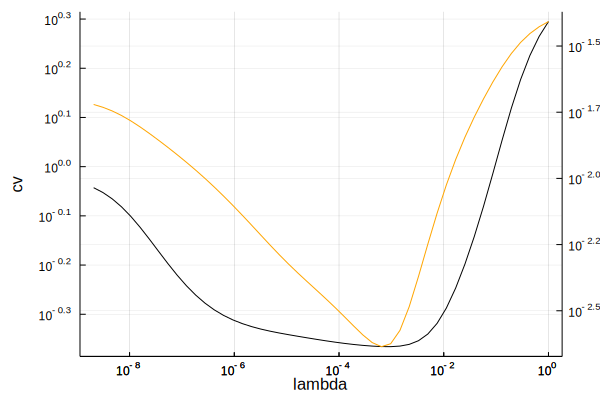

In [4]:
plot(lambda, cv,
  color = :black,
  axis = (:log10),
  xlabel = "lambda",
  ylabel = "cv",
  legend = :none)
plot!(twinx(), lambda, l2err,
  color = :orange,
  legend = :none,
  axis = (:log10),
  ylabel = "l2err",
  guidefontcolor = :orange)

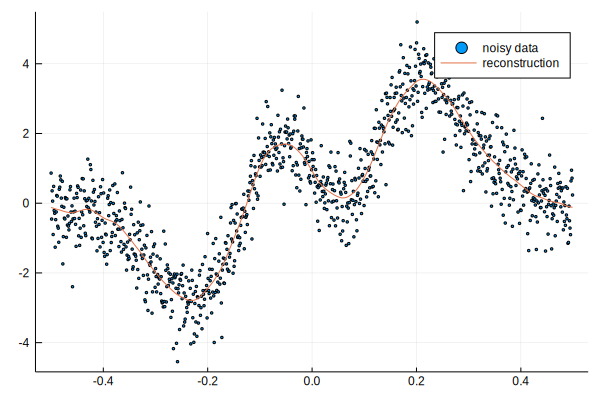

In [5]:
 scatter(nodes, f_e,
    markersize = 1,
    label = "noisy data")
  plot!(nodes, real(res.f_r),
    label = "reconstruction")